# Project: Investigating data from The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected the TMDb Movie Data set for my analysis. The data set contains information about 10 000 movies collected from The Movie Database (TMDb). User ratings and revenue are also part of the data set which gives interesting insights on the relationship between the user reception of a movie and the financial aspects of the movie (i.e. budget, revenue).

For my analysis I want to address two questions: <br>
__1.)__ What kinds of properties are associated with movies that receive a high rating? Are actor names, genres or budget related to a high rating? <br>
__2.)__ Does high revenue go hand in hand with a high user rating? Or are movies also rated badly even though they brought in a lot of money?

In [2]:
# Importing all relevant packages and displaying visualisations inside of the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

In [47]:
# Loading the data and taking a preview of columns and values in each column
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [48]:
#Determining overall size of dataframe
df.shape

(10866, 21)

Our data set has 10866 rows and 21 columns.

In [5]:
#Checking the datatypes in each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

We already can see potential problems when checking the datatypes that would need to be fixed before analysing.
Our __"id"__ column is currently of dtype integer but should rather be of dtype string as "imdb_id" is. 
__"release_date"__ is currently of dtype string __"release_date"__ is of dtype string, both should be transformed to a date dtype.
So we will have to change the datatypes of these three columns for our analysis to perform correctly. Moreover, the order of yyyy-mm-dd is not correct for release_date, so we should adjust that as well.

In [6]:
#Checking for missing data in the columns, i.e. the number of null values in every column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Several columns have null values, however none of the columns containing integer or float values. Therefore we should check if we have to drop the other columns or keep them in the data set. If we keep them, we have to be aware we have missing values e.g. when we analyze "production_companies". Also even though the values are not missing, we have many rows that have 0 as a value for budget and/or revenue. Therefore we should be cautious, however dropping the all columns with null values reduces the data input too drasticly (only 1992 rows left).

In [7]:
#Check if we have filled in, but incorrect values for e.g. budget
df.query('budget_adj == 0').head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00


In [8]:
#Checking for duplicate rows
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
#Deleting the duplicate row
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

In [10]:
#Check if id is without duplicates
df['id'].duplicated().sum()

0

As a last step, we can drop the two colums *budget* and *revenue* from our dataframe. As we have a copy of these columns that takes inflation into account, we should use these two columns for the analysis in order for the amounts to be comparable over time.

In [11]:
df.drop(['revenue', 'budget'], axis=1, inplace=True)

### Data Cleaning
As discovered, we have to adjust the dtype of the release_year as well as for the id in the following.

In [12]:
# Setting the dtype for release_year to date
df['release_year'] = df['release_year'].astype(str)
df['release_year'] = pd.to_datetime(df['release_year'])

As the dtype of release_year as integer, the conversion to datetime was causing incorrect values. A conversion to string and then converting to datetime solved these issues.

In [13]:
#Changing release_date dtype to date
df['release_date'] = pd.to_datetime(df['release_date'])

In [14]:
# Changing the dtype for id from int to string
df['id'] = df['id'].astype(str)

In [15]:
# Check if changes were performed correctly
df.dtypes

id                              object
imdb_id                         object
popularity                     float64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year            datetime64[ns]
budget_adj                     float64
revenue_adj                    float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### What kinds of properties are associated with movies that receive a high rating? Are actor names, genres or budget related to a high rating? 

Let's first get an overview of the rating in general. 

In [16]:
df['vote_average'].describe()

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

As the movie rating can go up to 10 and we have 9.2 as a maximum value, it seems like we don't have any unplausible data for this column which is good news. The mean rating is 5.98 with 1.5 being the worst rated movie.

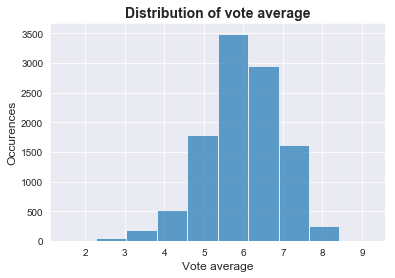

In [35]:
#Plotting the distribution of vote_average
dist_graph = df['vote_average'].plot(kind='hist', alpha = .7)
dist_graph.set_ylabel('Occurences', size=12)
dist_graph.set_xlabel('Vote average', size=12)
dist_graph.set_title('Distribution of vote average', weight='bold', size=14);

We can see from the graph that we have a near normal distribution for the vote_average. As we have seen before that we have several null values for the cast column, I create a subset of the original df without any null values for the cast column. 

In [19]:
#As there are several null rows in the cast column, I exclude these rows for the further analysis
df_cast = df[df['cast'].notnull()]

In [20]:
#Extracting a subset of df_cast with only the columns vote_average, release_years and cast in order to have a df where we can extract
#the individual actors from the pipe-separated column
df_cast_subset = pd.DataFrame(df_cast[['vote_average', 'cast', 'release_year']])

For the transformation of the cast column, I have found a post on stack overflow that I used as a basis for the data transformation but adjusted to fit my needs:
https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe

In [21]:
#I create a function for the transformation process to that I can re-use it for the genre column
#Listing the columns that I don't need to transform and therefore use as index in the function below
list_cols_for_index = ['vote_average', 'release_year']

def split_pipe_column(df_input, column_to_be_transformed, list_cols_for_index=list_cols_for_index):
    #Extracting all invididual actor names from the pipe-separated column
    df_output = pd.DataFrame(df_input.set_index(list_cols_for_index).stack().str.split("|", expand=True).stack().reset_index())
    #The transformation creates extra columns that have the prefix "level", therefore we want to delete them from the df
    list_columns = df_output.columns.astype(str)
    columns_to_drop = [column for column in list_columns if 'level' in column]
    #Dropping the two columns from the transformation above that don't carry relevant information
    df_output.drop(columns_to_drop, axis=1, inplace=True)
    #Renaming the "0" column to carry more information about the column's content
    df_output.rename(columns={0:column_to_be_transformed}, inplace=True)
    return df_output

In [22]:
#Transforming the df_cast_subset so that we get individual values for the cast names instead of pipe-seperation
df_cast_transformed = split_pipe_column(df_cast_subset, 'cast')

In [23]:
#Grouping by actor name so that we get a list of all movie votes that are connected to the actor's name
df_cast_votings = pd.DataFrame(df_cast_transformed.groupby('cast')['vote_average'].agg(lambda x: x.tolist()))

I want to calculate the spread of all the votings an actor has received, from his lowest voting to his highest voting. My reasoning is: If the spread is very minimal across all actors, the actor's name could be correlated to the voting of the movie. For example an actor like Brad Pitt could be a predictor for a high movie rating if the spread of his movie ratings is very little. To make sure that every actor in the set has at least two votings, I'll drop the rows with only one voting value.

In [24]:
#Adding a column that counts the number of votings per actor
df_cast_votings['count'] = df_cast_votings['vote_average'].apply(lambda x: len(x))

In [25]:
#Dropping the rows where an actor only has one voting
df_calculate_spread = df_cast_votings.query('count != 1').copy()

In [26]:
#Calculating the spread of voting values
df_calculate_spread['spread'] = df_calculate_spread['vote_average'].apply(lambda x: np.ptp(x))

In [27]:
#In order to display the values in a bar chart, I round to integer values without any decimal values and count the number of times the value was found in the dataset.
spread_counts = round(df_calculate_spread['spread'],0).unique()
spread_valuecounts = round(df_calculate_spread['spread'],0).value_counts()

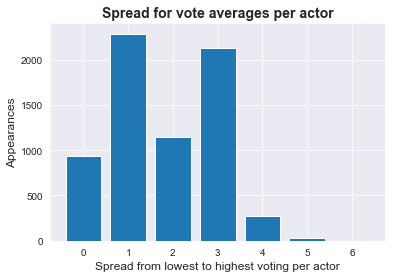

<Figure size 1440x1440 with 0 Axes>

In [34]:
#Creating a bar chart with pyplot to display the results
plt.bar(spread_counts, spread_valuecounts)
plt.title('Spread for vote averages per actor', weight='bold', size=14)
plt.xlabel('Spread from lowest to highest voting per actor', size=12)
plt.ylabel('Appearances', size=12)
plt.figure(figsize=(20,20));

My initial idea was that if I receive comparably low spread values overall, an actor would be a predicting factor for the average vote of a movie. However, as the graph above shows, the second largest bin is for actors where votings spread by 3 units. It makes a big difference, if a movie is rated an 8 or a 5. Therefore just looking at the actor's name is not predicting whether the movie will be rated good or bad.

Now I want to take a closer look at genre. As we also have pipe-separated values in the genres column, I am going to reuse my transformation function from above to split the column into single values

In [29]:
#Taking a subset of the original dataframe with only three columns that we need for the analysis, transforming the dataframe
df_genre = pd.DataFrame(df[['vote_average', 'genres', 'release_year']])
df_genre_transformed = split_pipe_column(df_genre, 'genres')

In [30]:
#Calculating the mean vote per genre to compare how genres perform
df_genre_votings = pd.DataFrame(df_genre_transformed.groupby('genres')['vote_average'].mean().sort_values())

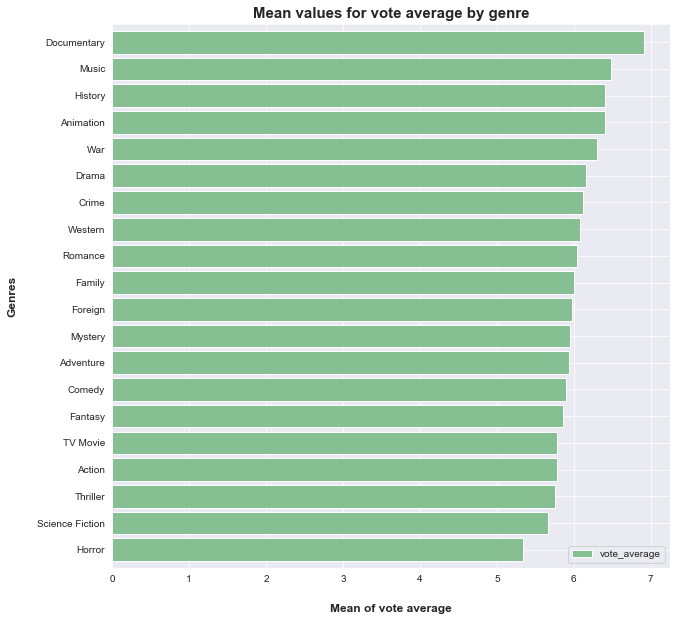

In [33]:
#Plotting the mean value of vote_average for the different genres to compare which genres received the best resp. worst ratings
graph = df_genre_votings.plot(kind='barh', figsize=(10,10), color='#86bf91', zorder=2, width=0.85)
graph.set_xlabel("Mean of vote average", labelpad=20, weight='bold', size=12)
graph.set_ylabel("Genres", labelpad=20, weight='bold', size=12)
graph.set_title('Mean values for vote average by genre', weight='bold', size=15);


Inspiration for styling the graph was taken from: https://mode.com/example-gallery/python_horizontal_bar/

On average, 'Documentary' is the best voted genre with a mean vote_average of nearly 7. 'Horror' is on average the worst rated genre. As all genres are on average more or less rated equally, also genre is not a good predictor for the rating of a movie. I am curious to see if the rating of documentaries is persistent over time, or if it has changed.

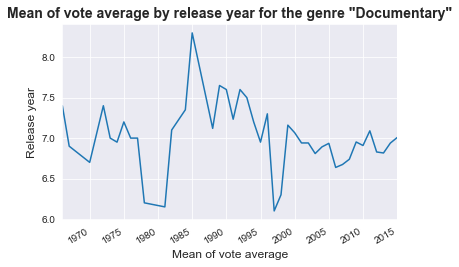

In [40]:
plot_documentaries = df_genre_transformed.query('genres == "Documentary"').groupby('release_year')['vote_average'].mean()
plot_graph=plot_documentaries.plot(kind='line')
plot_graph.set_xlabel('Mean of vote average', size=12)
plot_graph.set_ylabel('Release year', size=12)
plot_graph.set_title('Mean of vote average by release year for the genre "Documentary"', size=14, weight='bold');
                        

Apart from two lows around 1980 and 1998, the ratings for documentaries are on average rather constant over time.

As a last variable, I want to check whether the budget is correlated to the average voting. For this I will use a scatterplot to see if there is any correlation between the two variables.

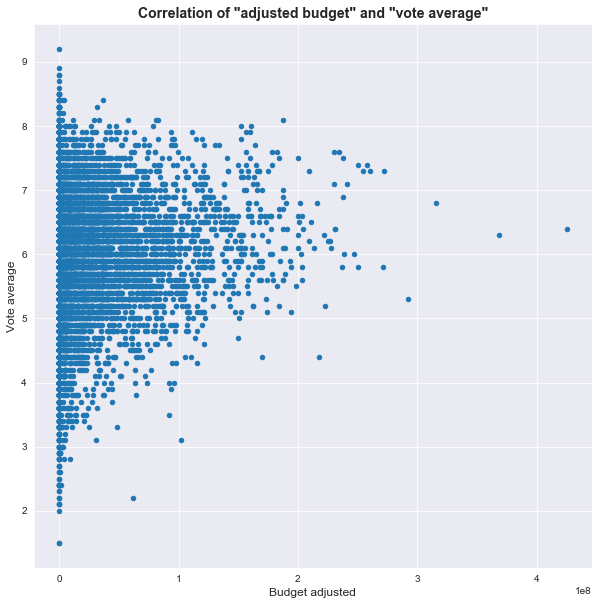

In [43]:
comp_budget_vote = df.plot(kind='scatter', x='budget_adj', y='vote_average', figsize=(10,10))
comp_budget_vote.set_xlabel('Budget adjusted', size=12)
comp_budget_vote.set_ylabel('Vote average', size=12)
comp_budget_vote.set_title('Correlation of "adjusted budget" and "vote average"', weight='bold', size=14);

There is no correlation visible between the budget of a movie and the voting it has received.

### Does high revenue go hand in hand with a high user rating? Or are movies also rated badly even though they brought in a lot of money?

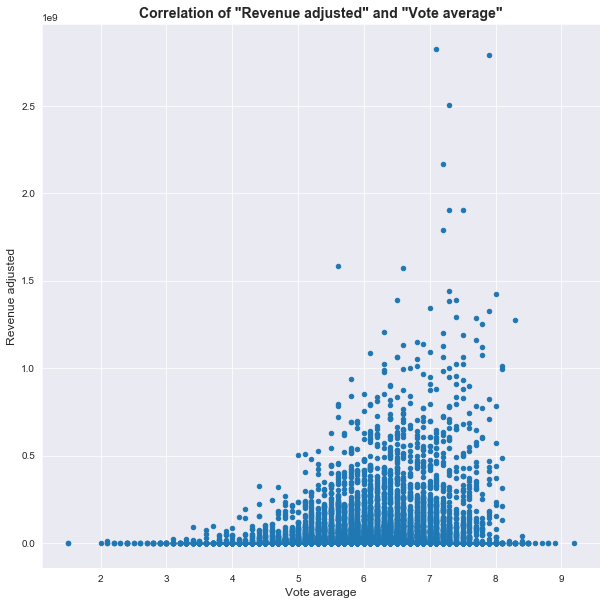

In [44]:
# Instead of budget, let's take a look at revenue as this might be a better indicator as it is related to the audience success of a movie.
rev_plot = df.plot(kind='scatter', x='vote_average', y='revenue_adj', figsize=(10,10));
rev_plot.set_xlabel('Vote average', size=12)
rev_plot.set_ylabel('Revenue adjusted', size=12)
rev_plot.set_title('Correlation of "Revenue adjusted" and "Vote average"', weight='bold', size=14);

There is a visible positive correlation between the revenue of a movie and the voting it has received. Movies that brought in high revenues also tend to receive a higher rating.

<a id='conclusions'></a>
## Conclusions

Before I conclude my analysis, I want to explain the limiations of the dataset in further detail. The dataset contains several columns that have varying numbers of null values. However, dropping null value rows would have been a decision that would have drastically reduced the depth of the dataset. Therefore I decided to only delete the one duplicate row and instead adjust the dataframes in the respective analyses accordingly. As an example: When looking at genre, I made sure to exclude the rows having a null value for genre in order not to create any biases in the analysis. Apart from the null values, I also found erroneous values for budget_adj and revenue_adj, sometimes both of them being 0, sometimes only one of them. However, as I was using both to plot them against vote_average individually, I left those rows in the dataset as there was also no senseful way to interpolate the data e.g. with mean values. It shows in the graphs above that a lot datapoints lie directly on the respective axes for the two analyses, which is explained by these erroneous values. 
Another issue of the dataset can be seen in the graph below, which shows the number of movies in the dataset per release year. As we can see, for newer years there are increasingly more movies present in the dataset. As for example budgets for blockbuster movies has increased within the last decades as compared to the 1970's this might lead to biases in the dataset. Therefore we have to be careful when interpreting the data, as it probably is not well-representative overall.

In my analysis, I took a look at four different variables and how they related to the average voting a movie has received. The more inherent features of a movie, i.e. the cast, the genre and the budget are directly correlated to the rating a movie gets. Even though one could think that e.g. a big actor's name could be correlated to high movie ratings, also star actors tend to play in movies that are badly rated once in a while.
Out of the four variables, revenue is the one that shows the strongest correlation to the average voting a movie receives. Therefore if a movie is successful financially, there is a tendency for the movie to receive a better rating than for movies that flop in cinema. These conclusions are drawn from the underlying data, however being aware that the quality as well as representativeness of the data can lead to biases.

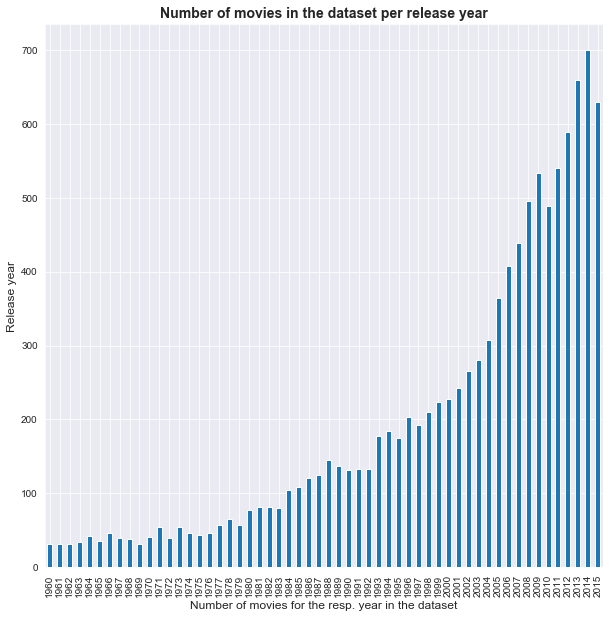

In [69]:
df_releaseyear_occ=df.groupby('release_year')['id'].nunique()
plot_releaseyear=df_test.plot(kind='bar', figsize=(10,10))
plot_releaseyear.set_xlabel('Number of movies for the resp. year in the dataset', size=12)
plot_releaseyear.set_ylabel('Release year', size=12)
plot_releaseyear.set_title('Number of movies in the dataset per release year', weight='bold', size=14);

In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0